## Import related library 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import r2_score
pal = sns.color_palette()

In [2]:
df_train = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\train.csv')
df_test = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\test.csv')


## Summarize the data

In [3]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Exploration
1. Identify any categorical variable are mostly 0 or 1 then we remove them
2. General visualization to see the categorical variable

In [6]:
#Unique Value ANalysis
#After one hot encoded all X variables, we can check if we have any variables has single value only and will not have much value to the prediction

unique_values_dict = {}
for col in df_train.columns:
    unique_value = str(np.sort(df_train[col].unique()).tolist())
    tlist = unique_values_dict.get(unique_value, [])
    tlist.append(col)
    unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  ['a', 'b', 'c', 'd', 'e', 'f', 'g']
['X3']
--------------------------------------------------
Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 

In [8]:
Result={}
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    Result[col]=df_train[[col]][(df_train[col]==1)].count()
d = {k: v for k, v in Result.items() if v[0] >= 5 and v[0]<=4204}
#Result
SubsetColList=list(d.keys())
SubsetColList.append('ID')
#SubsetColList
d

{'X10': X10    56
 dtype: int64, 'X100': X100    2905
 dtype: int64, 'X101': X101    3938
 dtype: int64, 'X102': X102    29
 dtype: int64, 'X103': X103    3302
 dtype: int64, 'X104': X104    8
 dtype: int64, 'X105': X105    10
 dtype: int64, 'X106': X106    55
 dtype: int64, 'X108': X108    62
 dtype: int64, 'X109': X109    170
 dtype: int64, 'X111': X111    4103
 dtype: int64, 'X112': X112    12
 dtype: int64, 'X113': X113    94
 dtype: int64, 'X114': X114    615
 dtype: int64, 'X115': X115    1202
 dtype: int64, 'X116': X116    828
 dtype: int64, 'X117': X117    207
 dtype: int64, 'X118': X118    2619
 dtype: int64, 'X119': X119    2619
 dtype: int64, 'X12': X12    316
 dtype: int64, 'X120': X120    4031
 dtype: int64, 'X122': X122    30
 dtype: int64, 'X123': X123    11
 dtype: int64, 'X125': X125    13
 dtype: int64, 'X126': X126    164
 dtype: int64, 'X127': X127    2084
 dtype: int64, 'X128': X128    4034
 dtype: int64, 'X129': X129    516
 dtype: int64, 'X13': X13    244
 dtype:

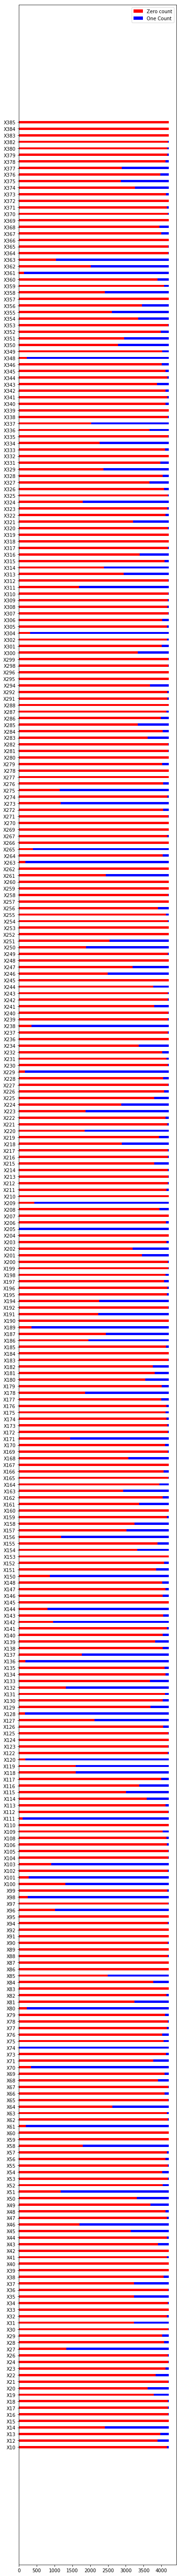

In [15]:
# To show different the proportion of 0 and 1

zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((df_train[col]==0).sum())
    one_count_list.append((df_train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35



plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Number of features: 376
Feature types:
Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


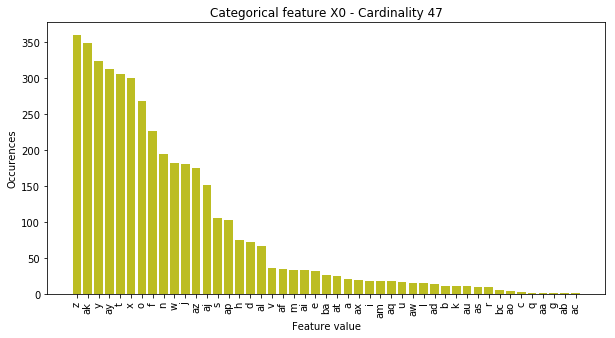

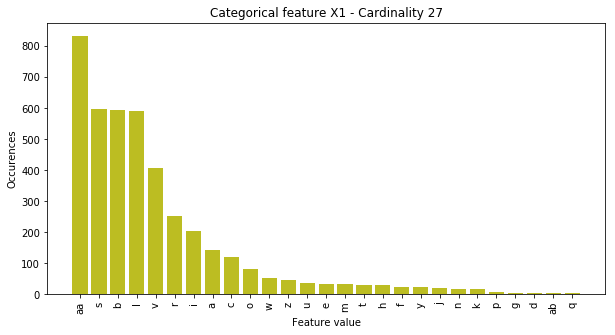

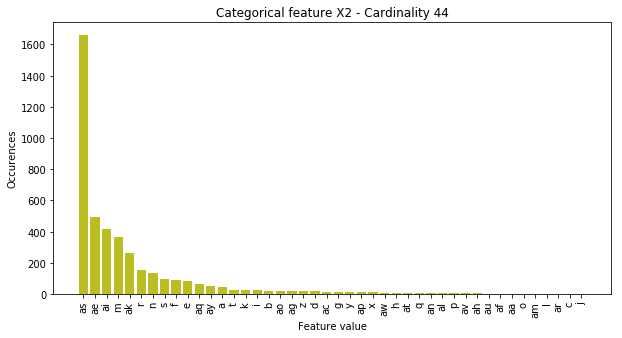

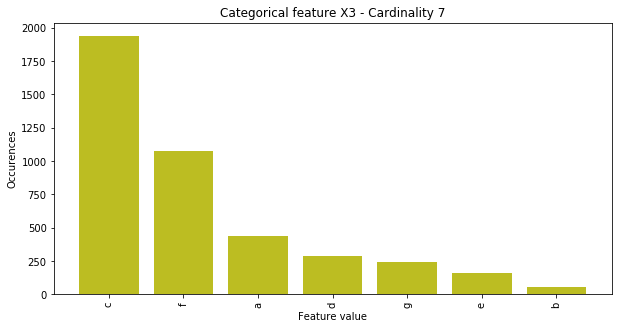

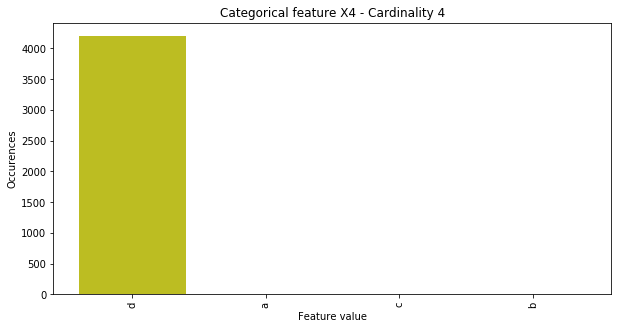

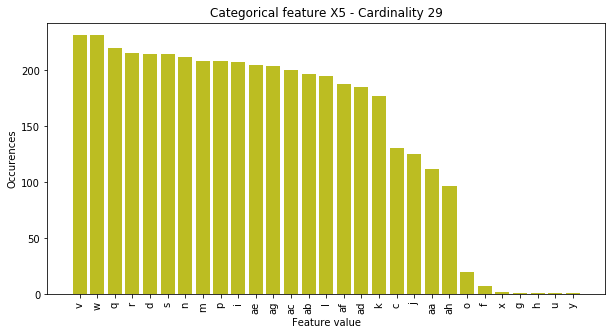

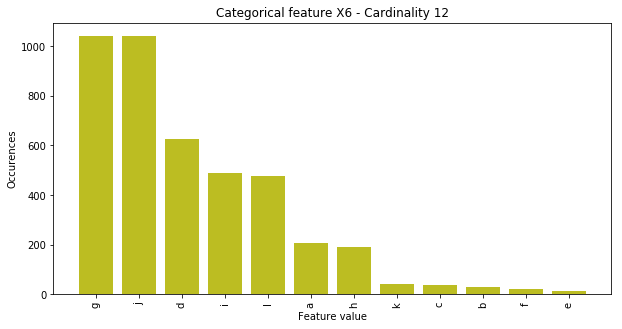

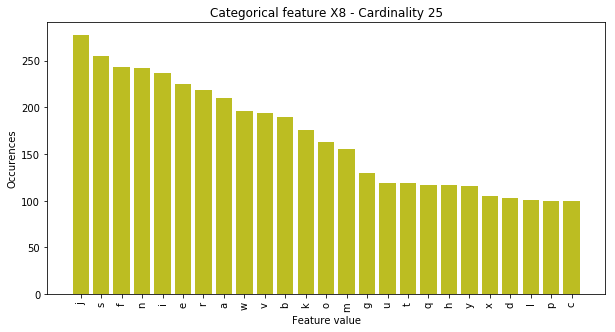

In [20]:
#############################
#############EDA#############
#############################
cols = [c for c in df_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
df_train[cols].dtypes.value_counts()

counts = [[], [], []]
for c in cols:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])


for c in counts[2]:
    value_counts = df_train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(df_train[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[8])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

In [10]:
df_train.loc[(df_train.y>200)]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


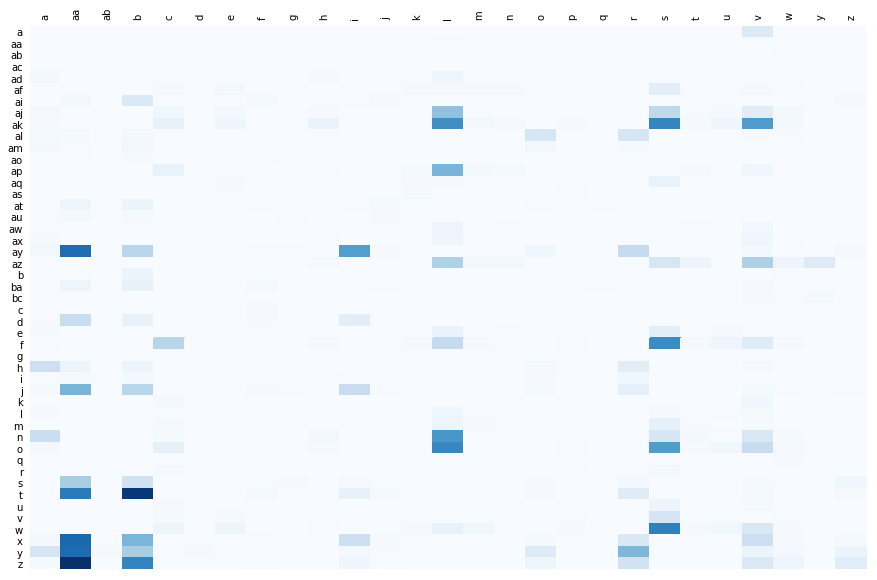

In [11]:
#Create Cross Tabulate tables  --pick two variable to plot
DF_Freq=pd.crosstab(df_train.X0, df_train.X1,margins=True)

# Create column & row labels
column_labels = list(DF_Freq.columns.values)
row_labels = DF_Freq.index.values.tolist()
del DF_Freq['All']#delete All column
DF_Freq = DF_Freq.ix[:-1]#delete last row (All)


#plot to a heatmap using matplotlib - (cannot install seaborn library)
fig,ax = plt.subplots()
heatmap = ax.pcolor(DF_Freq,cmap=plt.cm.Blues)
#format
fig = plt.gcf()
fig.set_size_inches(15,10)
#turn off the frame
ax.set_frame_on(False)
# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(DF_Freq.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(DF_Freq.shape[1])+0.5, minor=False)
# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
#rotate
plt.xticks(rotation=90)
#remove gridlines
ax.grid(False)
# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 
for t in ax.yaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False  
plt.show()    
####
    
 

1. From the Contingency table above we can see X0 and X1 are highly correlated for several values


In [ ]:
#Box Plot

ColX="ID"
ax = sns.boxplot(x=ColX, y="y", data=df_train[["y",ColX]])



In [ ]:
sns.set(style="ticks")

sns.pairplot(df_train)

## Gradient Boosting - Version 1 using labelencoder

In [36]:
# process columns, apply LabelEncoder to categorical features
df_train = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\train.csv')
df_test = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\test.csv')
train = df_train
test=df_test

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))



Shape train: (4209, 378)
Shape test: (4209, 377)


In [37]:
# Remove highly skewed variable
unique_values_dict1 = {}
df_train_x1 = train.drop(["y"], axis=1)
for col in df_train_x1.columns:
    unique_value = str(np.sort(df_train_x1[col].unique()).tolist())
    tlist = unique_values_dict1.get(unique_value, [])
    tlist.append(col)
    unique_values_dict1[unique_value] = tlist[:]
#for unique_val, columns in unique_values_dict1.items():
    #print("Columns containing the unique values : ",unique_val)
    #print(columns)
#    print("--------------------------------------------------")
    
Result1={}
cols_list1 = unique_values_dict1['[0, 1]']
for col in cols_list1:
    Result1[col]=df_train_x1[[col]][(df_train_x1[col]==1)].count()
d = {k: v for k, v in Result1.items() if v[0] >= 5 and v[0]<=4204}
#Result
SubsetColList1=list(d.keys())
SubsetColList1.append('ID')
SubsetColList1.append('y')
#d


In [38]:
train = df_train[SubsetColList1]
SubsetColList1.remove('y')
test = df_test[SubsetColList1]

In [39]:
from sklearn.decomposition import PCA, FastICA
n_comp = 10

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
y_train = train["y"]
y_mean = np.mean(y_train)

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [40]:
()# mmm, xgboost, loved by everyone ^-^
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [41]:
# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}


x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(train.drop('y', axis=1), y_train, test_size=0.2, random_state=3333)


# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(x_train_split, y_train_split)
dvalid = xgb.DMatrix(x_valid_split, y_valid_split)
dtest = xgb.DMatrix(test)


# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=1000, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)


[0]	train-rmse:12.7224	test-rmse:12.7109
[50]	train-rmse:11.1726	test-rmse:11.2548
[100]	train-rmse:10.0952	test-rmse:10.2721
[150]	train-rmse:9.3605	test-rmse:9.62335
[200]	train-rmse:8.86343	test-rmse:9.20957
[250]	train-rmse:8.52815	test-rmse:8.9458
[300]	train-rmse:8.29836	test-rmse:8.78261
[350]	train-rmse:8.11733	test-rmse:8.68146
[400]	train-rmse:7.95618	test-rmse:8.61722
[450]	train-rmse:7.81136	test-rmse:8.57681
[500]	train-rmse:7.69114	test-rmse:8.54974
[550]	train-rmse:7.58551	test-rmse:8.53532
[600]	train-rmse:7.48321	test-rmse:8.52729
[650]	train-rmse:7.39106	test-rmse:8.52128
[700]	train-rmse:7.30982	test-rmse:8.51841
[750]	train-rmse:7.2305	test-rmse:8.51817
[800]	train-rmse:7.16294	test-rmse:8.51782
767


In [42]:

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)


watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_rounds,watchlist,feval=xgb_r2_score,maximize=True, verbose_eval=50)

[0]	train-r2:0.005475	valid-r2:0.002477
[50]	train-r2:0.230829	valid-r2:0.234923
[100]	train-r2:0.369819	valid-r2:0.375362
[150]	train-r2:0.456218	valid-r2:0.460891
[200]	train-r2:0.510374	valid-r2:0.512455
[250]	train-r2:0.54493	valid-r2:0.544264
[300]	train-r2:0.567289	valid-r2:0.5641
[350]	train-r2:0.582332	valid-r2:0.575552
[400]	train-r2:0.594173	valid-r2:0.581498
[450]	train-r2:0.604546	valid-r2:0.583688
[500]	train-r2:0.615092	valid-r2:0.583069
[550]	train-r2:0.623332	valid-r2:0.580395
[600]	train-r2:0.629313	valid-r2:0.577943
[650]	train-r2:0.636243	valid-r2:0.574732
[700]	train-r2:0.643557	valid-r2:0.570967
[750]	train-r2:0.650296	valid-r2:0.56467


In [43]:
# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score

# now fixed, correct calculation
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.652234505981


In [33]:
# make predictions and save results
y_pred = model.predict(dtest)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('xgboost-depth{}-pca-ica7.csv'.format(xgb_params['max_depth']), index=False)

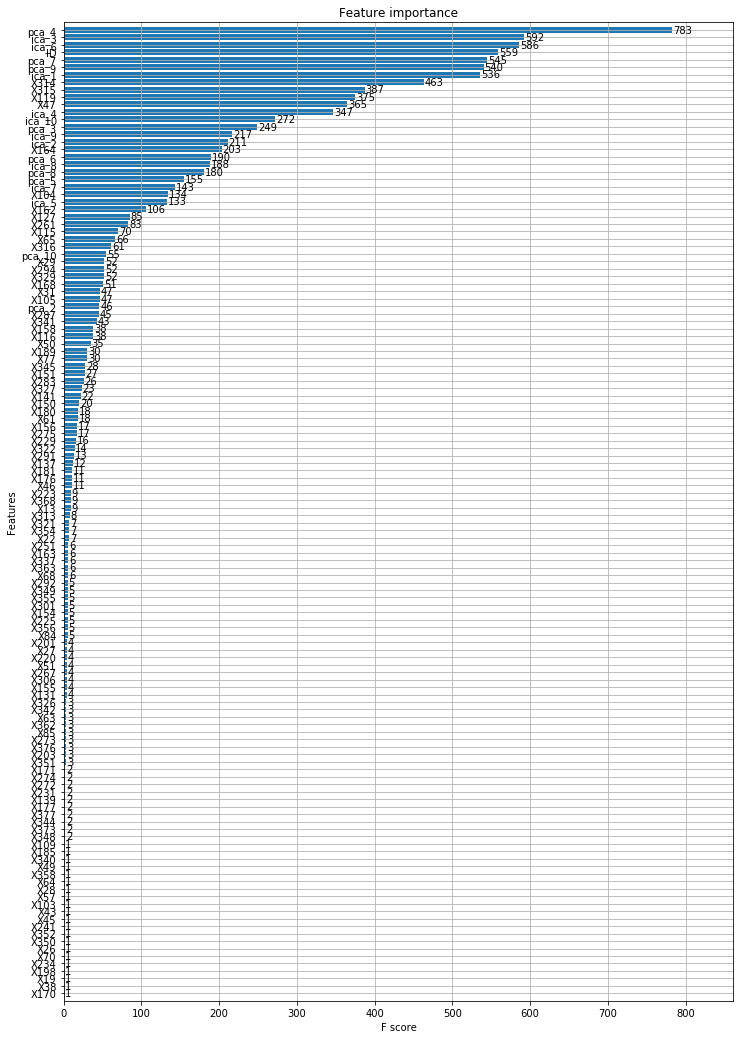

In [44]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model,  height=0.8, ax=ax)
plt.show()

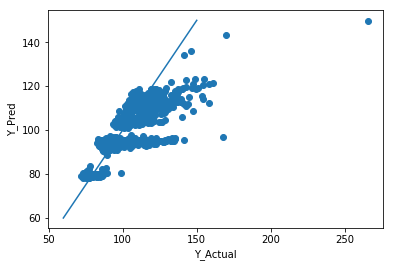

In [46]:
# scatter plot of pred vs actual
y_pred = model.predict(dtrain)
y_actual=y_train_split
plt.scatter(y_actual,y_pred) #(x,y)
plt.plot( [60,150],[60,150] )
plt.ylabel('Y_Pred')
plt.xlabel('Y_Actual')
plt.show()

## Gradient Boosting - Version 2 using one hot encoder version

In [47]:
# Reload the data
df_train = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\train.csv')
df_test = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\test.csv')


## Pre-processing the data
1. One-hot-encoding 

In [48]:
df_train_y = df_train[df_train.columns[1]]
df_train_id = df_train[df_train.columns[0]]
df_train_X_1=df_train[df_train.columns[2:10]]  # first 8 multi categoricl variables
NumberOfColumn=df_train.count(axis=1)[1]-1
df_train_X_2=df_train[df_train.columns[11:NumberOfColumn]]


# One Hot Encoding 
df_train_X_1_OHE=pd.get_dummies(df_train_X_1)
df_train_X_Combined=pd.concat([df_train_id,df_train_X_1_OHE,df_train_X_2],axis=1)


df_test_id = df_test[df_test.columns[0]]
df_test_X_1=df_test[df_test.columns[1:9]]
NumberOfColumn=df_test.count(axis=1)[1]-1
df_test_X_2=df_train[df_train.columns[10:NumberOfColumn]]


# One Hot Encoding 
df_test_X_1_OHE=pd.get_dummies(df_test_X_1)
df_test_X_Combined=pd.concat([df_test_id,df_test_X_1_OHE,df_test_X_2],axis=1)


In [49]:
colList=[]
colTrainUniqueValue=[]
colTestUniqueValue=[]
for col in df_train_X_1.columns[0:]:
    colList.append(col)
    colTrainUniqueValue.append(len(df_train_X_1[col].unique()))
    colTestUniqueValue.append(len(df_test_X_1[col].unique()))                          
#X0,X2,X5,

EDA_UniqueValueCheck = pd.DataFrame({'ColumnName':colList,
                   'TrainDataUniqueValue':colTrainUniqueValue,
                   'TestDataUniqueValue':colTestUniqueValue,
                  })

EDA_UniqueValueCheck

# There is additional categorical value in Test Data in X2 and X5

,ColumnName,TestDataUniqueValue,TrainDataUniqueValue
0,X0,49,47
1,X1,27,27
2,X2,45,44
3,X3,7,7
4,X4,4,4
5,X5,32,29
6,X6,12,12
7,X8,25,25


In [50]:
Result={}
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    Result[col]=df_train_X_Combined[[col]][(df_train_X_Combined[col]==1)].count()
d = {k: v for k, v in Result.items() if v[0] >= 5 and v[0]<=4204}
#Result
SubsetColList=list(d.keys())
SubsetColList.append('ID')

In [51]:
y_train=df_train_y
x_train=df_train_X_Combined[SubsetColList]
x_test=df_test_X_Combined[SubsetColList]

In [52]:
from sklearn.decomposition import PCA, FastICA
n_comp = 10

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(x_train)
pca2_results_test = pca.transform(x_test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(x_train)
ica2_results_test = ica.transform(x_test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    x_train['pca_' + str(i)] = pca2_results_train[:,i-1]
    x_test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    x_train['ica_' + str(i)] = ica2_results_train[:,i-1]
    x_test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
y_mean = np.mean(y_train)

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\j

In [53]:
()# mmm, xgboost, loved by everyone ^-^
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [54]:
# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 800, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}



x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train, y_train, test_size=0.2, random_state=3333)




# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(x_train_split, y_train_split)
dvalid = xgb.DMatrix(x_valid_split, y_valid_split)
dtest = xgb.DMatrix(x_test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=1000, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=5, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)


watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_rounds,watchlist,feval=xgb_r2_score,maximize=True, verbose_eval=10)

[0]	train-rmse:12.7225	test-rmse:12.7105
[5]	train-rmse:12.5432	test-rmse:12.5378
[10]	train-rmse:12.3693	test-rmse:12.3721
[15]	train-rmse:12.2018	test-rmse:12.2125
[20]	train-rmse:12.0397	test-rmse:12.0591
[25]	train-rmse:11.8835	test-rmse:11.9117
[30]	train-rmse:11.7327	test-rmse:11.7692
[35]	train-rmse:11.5875	test-rmse:11.6322
[40]	train-rmse:11.4472	test-rmse:11.5008
[45]	train-rmse:11.3118	test-rmse:11.3734
[50]	train-rmse:11.1814	test-rmse:11.2512
[55]	train-rmse:11.0554	test-rmse:11.1338
[60]	train-rmse:10.9341	test-rmse:11.0207
[65]	train-rmse:10.8172	test-rmse:10.912
[70]	train-rmse:10.7046	test-rmse:10.8083
[75]	train-rmse:10.5962	test-rmse:10.7071
[80]	train-rmse:10.4921	test-rmse:10.611
[85]	train-rmse:10.3915	test-rmse:10.5188
[90]	train-rmse:10.2947	test-rmse:10.4309
[95]	train-rmse:10.2017	test-rmse:10.3464
[100]	train-rmse:10.1122	test-rmse:10.2653
[105]	train-rmse:10.0259	test-rmse:10.1873
[110]	train-rmse:9.9428	test-rmse:10.1113
[115]	train-rmse:9.86343	test-rmse:1

In [55]:
# check f2-score (to get higher score - increase num_boost_round in previous cell)


# now fixed, correct calculation
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.621565203998


In [56]:
# make predictions and save results
y_pred = model.predict(dtest)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('xgboost-depth{}-pca-ica5.csv'.format(xgb_params['max_depth']), index=False)

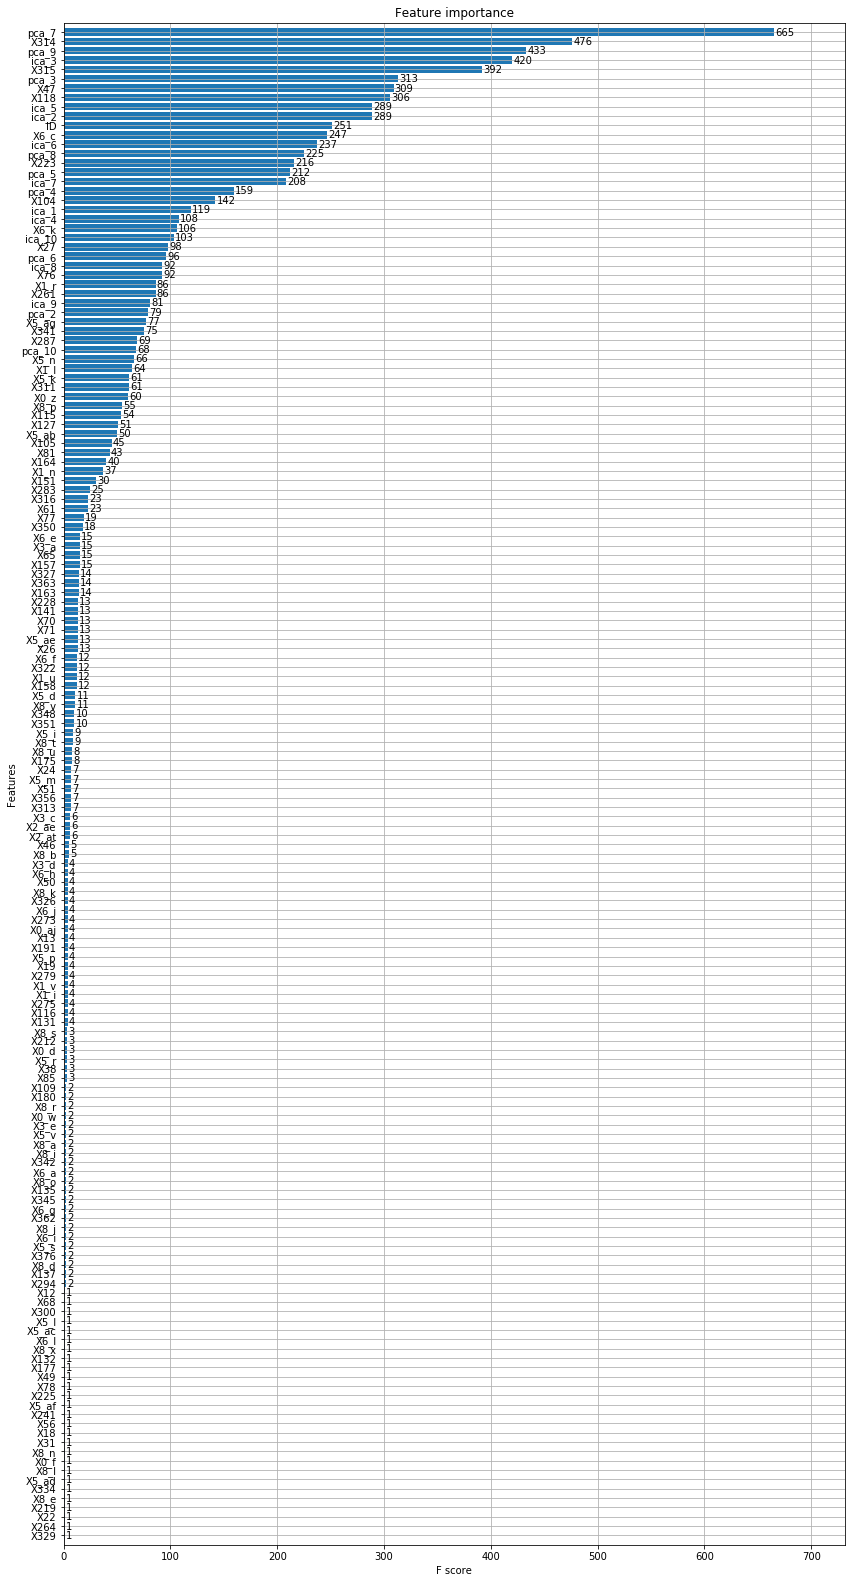

In [57]:
# plot the important features #
fig, ax = plt.subplots(figsize=(14,28))
xgb.plot_importance(model,  height=0.8, ax=ax)
plt.show()

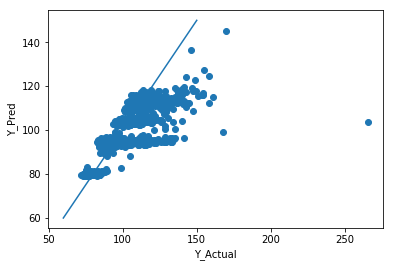

In [58]:
# scatter plot of pred vs actual
y_pred = model.predict(dtrain)
y_actual=y_train_split
plt.scatter(y_actual,y_pred) #(x,y)
plt.plot( [60,150],[60,150] )
plt.ylabel('Y_Pred')
plt.xlabel('Y_Actual')
plt.show()

## Random Forest

In [16]:
### Processing the data

# process columns, apply LabelEncoder to categorical features
df_train = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\train.csv')
df_test = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\test.csv')


train = df_train
test=df_test

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))


# Remove highly skewed variables 
unique_values_dict1 = {}
df_train_x1 = train.drop(["y"], axis=1)
for col in df_train_x1.columns:
    unique_value = str(np.sort(df_train_x1[col].unique()).tolist())
    tlist = unique_values_dict1.get(unique_value, [])
    tlist.append(col)
    unique_values_dict1[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict1.items():
    #print("Columns containing the unique values : ",unique_val)
    #print(columns)
    print("--------------------------------------------------")
    
ResultA={}
cols_list1 = unique_values_dict1['[0, 1]']
for col in cols_list1:
    ResultA[col]=df_train_x1[[col]][(df_train_x1[col]==1)].count()
d = {k: v for k, v in ResultA.items() if v[0] >= 5 and v[0]<=4204}
#Result
SubsetColList1=list(d.keys())
SubsetColList1.append('ID')
SubsetColList1.append('y')


#Process Data
train = df_train[SubsetColList1]
SubsetColList1.remove('y')
test = df_test[SubsetColList1]

#Creating ICA PCA components for the RF Regressor
from sklearn.decomposition import PCA, FastICA
n_comp = 10

# PCA
pca = PCA(n_components=n_comp, random_state=55)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=55)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]


Shape train: (4209, 378)
Shape test: (4209, 377)
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


In [17]:
train_x = train.drop(['y'],axis=1)
train_y = train['y']

from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

# build a classifier
clf = RandomForestRegressor(random_state=30)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 6 , 10],
              "min_samples_leaf": [1],
              "bootstrap": [True],
             "n_estimators":[1500,3000,5000,7000]}
print("Start GridSearch")

Start GridSearch


In [18]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=10)
start = time.time()
grid_search.fit(train_x, train_y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1, score=0.099176, total=   4.2s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1, score=0.134275, total=   4.0s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=1500, min_samples_leaf=1, score=0.130334, total=   5.2s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1, score=0.096991, total=  10.4s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1, score=0.131526, total=   9.2s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.9s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=3000, min_samples_leaf=1, score=0.126704, total=   8.7s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1, score=0.098072, total=  13.6s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.0min remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1, score=0.133697, total=  13.3s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=5000, min_samples_leaf=1, score=0.127586, total=  13.2s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1, score=0.096959, total=  20.3s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1, score=0.132738, total=  31.3s
[CV] bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=3, max_features=1, n_estimators=7000, min_samples_leaf=1, score=0.125802, total=  19.2s
[CV] bootstrap=True, max_depth=3, max_features=3, n_estimators=1500, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=3, max_features=3, n_estimators=1500, min_samples_leaf=1, score=0.188515, total=   5.6s
[CV] bootstrap=True, max_depth=3, max_features=3, n_estimators=1500, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=3, max_features=3, n_estimators=1500, min_samples_leaf=1, score=0.251372, total=   5.8s
[CV] bootstrap=True, max_depth=3, max_featur

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 82.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=30,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [3, None], 'max_features': [1, 3, 6, 10], 'n_estimators': [1500, 3000, 5000, 7000], 'min_samples_leaf': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [19]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


GridSearchCV took 5093.25 seconds for 32 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.481 (std: 0.041)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 3000, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.480 (std: 0.041)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 7000, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.480 (std: 0.041)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 5000, 'min_samples_leaf': 1}



In [20]:
## Create Final Model
RFmodel = RandomForestRegressor(n_estimators=7000,max_depth=None, min_samples_leaf=1,bootstrap=True, max_features=10,  random_state=30)
RFmodel.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=7000, n_jobs=1,
           oob_score=False, random_state=30, verbose=0, warm_start=False)

In [21]:
# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score

# now fixed, correct calculation
print(r2_score(train_y, RFmodel.predict(train_x)))
#print(RFmodel.oob_score_)

0.929802396211


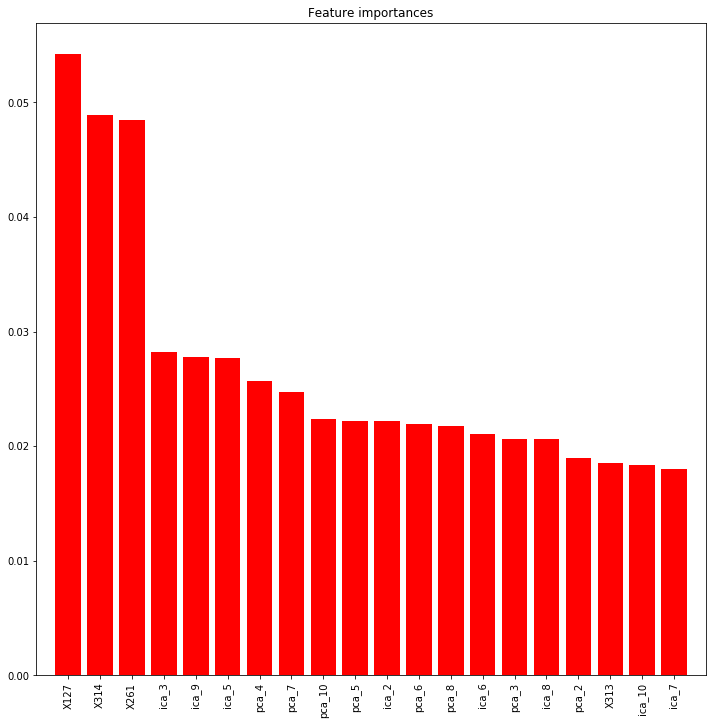

In [22]:
feat_names = train_x.columns.values
## plot the importances ##
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [23]:
# make predictions and save results
y_pred = RFmodel.predict(test)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('RF-depth{}-pca-ica1.csv'.format(0), index=False)


# XGBoost - LabelEncoder --0.5680
# XGBoost -- One Hot Encoder --  (-.0.48)
# RF - Tuned - 0.49


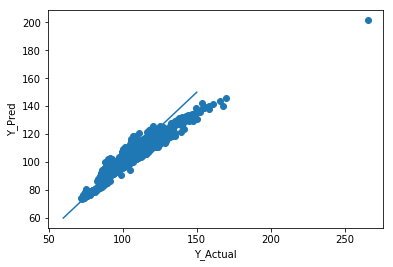

In [24]:
# scatter plot of pred vs actual
y_pred = RFmodel.predict(train_x)
y_actual=train_y
plt.scatter(y_actual,y_pred) #(x,y)
plt.plot( [60,150],[60,150] )
plt.ylabel('Y_Pred')
plt.xlabel('Y_Actual')
plt.show()

## Stacked Model

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum numbe

Training 1 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 1 is 0.632776386837
RMSE of Fold 1 is 7.41897540513
Training 2 Fold
R2 Scored of Fold 2 is 0.612945761755
RMSE of Fold 2 is 7.84803788744
Training 3 Fold
R2 Scored of Fold 3 is 0.453344355542
RMSE of Fold 3 is 9.11172395359
Training 4 Fold
R2 Scored of Fold 4 is 0.540330360353
RMSE of Fold 4 is 8.13749257969
Training 5 Fold
R2 Scored of Fold 5 is 0.417146807078
RMSE of Fold 5 is 10.7390502595
Start Training
Calculating In-Bag R2 Score
0.69238319727
Calculating Out-Bag R2 Score
0.531308734313
Calculating In-Bag RMSE
7.03155683366
Calculating Out-Bag RMSE
8.65105601707
GBRregressor Done
Training 1 Fold
R2 Scored of Fold 1 is 0.164852908131
RMSE of Fold 1 is 11.1881973473
Training 2 Fold
R2 Scored of Fold 2 is 0.138610775123
RMSE of Fold 2 is 11.7077892118
Training 3 Fold
R2 Scored of Fold 3 is 0.157921307143
RMSE of Fold 3 is 11.308889873
Training 4 Fold
R2 Scored of Fold 4 is 0.146611566467
RMSE of Fold 4 is 11.0876899113
Training 5 Fold
R2 Scored of Fold 5 is 0.111121

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 1 is 0.558277868093
RMSE of Fold 1 is 8.13679194609
Training 2 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 2 is 0.522301814967
RMSE of Fold 2 is 8.71870478929
Training 3 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 3 is 0.591976061411
RMSE of Fold 3 is 7.87202486987
Training 4 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 4 is 0.497936946089
RMSE of Fold 4 is 8.50446165077
Training 5 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 5 is 0.378524745619
RMSE of Fold 5 is 11.0891486529
Start Training
Calculating In-Bag R2 Score
0.933276002865
Calculating Out-Bag R2 Score
0.509803487236
Calculating In-Bag RMSE
3.27482043636
Calculating Out-Bag RMSE
8.86422638179
RF Done


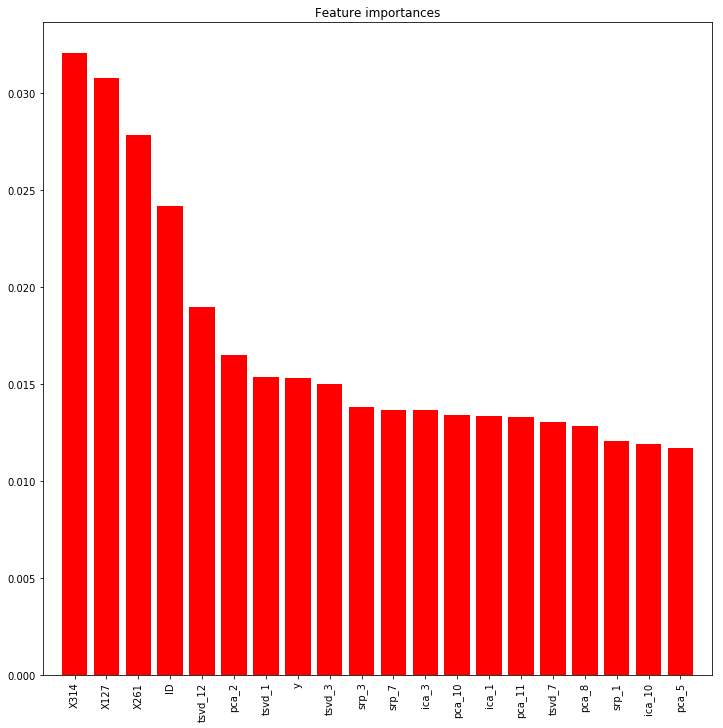

Training 1 Fold


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2 Scored of Fold 1 is 0.636583195064
RMSE of Fold 1 is 7.3804209775
Training 2 Fold
R2 Scored of Fold 2 is 0.607437610831
RMSE of Fold 2 is 7.90368314722
Training 3 Fold
R2 Scored of Fold 3 is 0.631379705855
RMSE of Fold 3 is 7.48226794118
Training 4 Fold
R2 Scored of Fold 4 is 0.558426607189
RMSE of Fold 4 is 7.97570613204
Training 5 Fold
R2 Scored of Fold 5 is 0.439920972768
RMSE of Fold 5 is 10.5271531255
Start Training
Calculating In-Bag R2 Score
0.59173660059
Calculating Out-Bag R2 Score
0.574749618341
Calculating In-Bag RMSE
8.10059068233
Calculating Out-Bag RMSE
8.25384626468


C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# The model is referred from Kaggle competition kernel shared : 
"""
Created on Sat Jul  8 08:45:55 2017

@Original author: rupesh
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


## This script contains four independent models, the stacking part: Use lgb, gbdt and Lasso as 
## Level 1 models. Meta model is xgb. This may count for 25% of the final result.


import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble.forest import RandomForestRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

train = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\train.csv')
test = pd.read_csv('C:\\Users\\jseah003\\Desktop\\GreenManufacturing\\test.csv')

#target=train['y']
#train.drop(['y'],axis=1,inplace=True)
#test['y']=np.zeros(train.shape[0])
# Cat conversion


for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

y=train['y'] 
train.drop(['y'],inplace=True,axis=1)       
combine=pd.concat([train,test])
columns=['X1','X2','X3','X4','X5','X6','X8']
for column in columns:
    temp=pd.get_dummies(pd.Series(combine[column]))
    combine=pd.concat([combine,temp],axis=1)
    combine= combine.drop([column], axis=1)
        
# Define some useful functions

train=combine[:train.shape[0]]
test=combine[train.shape[0]:] 


def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

train = df_column_uniquify(train)  
test = df_column_uniquify(test)   
train['y']=y

def get_additional_features(train,test,magic=False,ID=False):
    col = list(test.columns)
    if ID!=True:
        col.remove('ID')
    n_comp = 12
    # tSVD
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(train[col])
    tsvd_results_test = tsvd.transform(test[col])
    # PCA
    pca = PCA(n_components=n_comp, random_state=420)
    pca2_results_train = pca.fit_transform(train[col])
    pca2_results_test = pca.transform(test[col])
    # ICA
    ica = FastICA(n_components=n_comp, random_state=420)
    ica2_results_train = ica.fit_transform(train[col])
    ica2_results_test = ica.transform(test[col])
    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(train[col])
    grp_results_test = grp.transform(test[col])
    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(train[col])
    srp_results_test = srp.transform(test[col])
    for i in range(1, n_comp + 1):
        train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]
        train['pca_' + str(i)] = pca2_results_train[:, i - 1]
        test['pca_' + str(i)] = pca2_results_test[:, i - 1]
        train['ica_' + str(i)] = ica2_results_train[:, i - 1]
        test['ica_' + str(i)] = ica2_results_test[:, i - 1]
        train['grp_' + str(i)] = grp_results_train[:, i - 1]
        test['grp_' + str(i)] = grp_results_test[:, i - 1]
        train['srp_' + str(i)] = srp_results_train[:, i - 1]
        test['srp_' + str(i)] = srp_results_test[:, i - 1]
    if magic==True:
        magic_mat = train[['ID','X0','y']]
        magic_mat = magic_mat.groupby(['X0'])['y'].mean()
        magic_mat = pd.DataFrame({'X0':magic_mat.index,'magic':list(magic_mat)})
        mean_magic = magic_mat['magic'].mean()
        train = train.merge(magic_mat,on='X0',how='left')
        test = test.merge(magic_mat,on='X0',how = 'left')
        test['magic'] = test['magic'].fillna(mean_magic)
    return train,test

## Preparing stacking functions. Each one takes the out of bag values as the Input

## xgb will not be used in this case, but still post it here.
def get_xgb_stack_data(params,rounds,train,col,label,test):
    ID = []
    train = train.reset_index(drop=True)
    kf = KFold(n_splits=5,shuffle=False)
    i=0
    R2_Score = []
    RMSE = []
    for train_index, test_index in kf.split(train):
        print("Training "+str(i+1)+' Fold')
        X_train, X_test = train.iloc[train_index,:], train.iloc[test_index,:]
        y_train, y_test = label.iloc[train_index],label.iloc[test_index]
        dtrain = xgb.DMatrix(X_train[col],y_train)
        dtest = xgb.DMatrix(X_test[col])
        model = xgb.train(params,dtrain,num_boost_round=rounds)
        pred = model.predict(dtest)
        X_test['label'] = list(y_test)
        X_test['predicted'] = pred
        r2 = r2_score(y_test,pred)
        rmse = MSE(y_test,pred)**0.5
        print('R2 Scored of Fold '+str(i+1)+' is '+str(r2))
        R2_Score.append(r2)
        RMSE.append(rmse)
        print('RMSE of Fold '+str(i+1)+' is '+str(rmse))
        ID.append(X_test['ID'])
        if i==0:
            Final = X_test
        else:
            Final = Final.append(X_test,ignore_index=True)
        i+=1
    dtrain_ = xgb.DMatrix(train[col],label)
    dtest_ = xgb.DMatrix(test[col])
    print('Start Training')
    model_ = xgb.train(params,dtrain_,num_boost_round=rounds)
    Final_pred = model_.predict(dtest_)
    Final_pred = pd.DataFrame({'ID':test['ID'],'y':Final_pred})
    print('Calculating In-Bag R2 Score')
    print(r2_score(dtrain_.get_label(), model.predict(dtrain_)))
    print('Calculating Out-Bag R2 Score')
    print(np.mean(R2_Score))
    print('Calculating In-Bag RMSE')
    print(MSE(dtrain_.get_label(), model.predict(dtrain_))**0.5)
    print('Calculating Out-Bag RMSE')
    print(np.mean(RMSE))
    
    fig, ax = plt.subplots(figsize=(14,28))
    xgb.plot_importance(model,  height=0.8, ax=ax)
    plt.show()
    return Final,Final_pred


def get_lgb_stack_data(params,rounds,train,col,label,test):
    ID = []
    train = train.reset_index(drop=True)
    kf = KFold(n_splits=5,shuffle=False)
    i=0
    R2_Score = []
    RMSE = []
    for train_index, test_index in kf.split(train):
        print("Training "+str(i+1)+' Fold')
        X_train, X_test = train.iloc[train_index,:], train.iloc[test_index,:]
        y_train, y_test = label.iloc[train_index],label.iloc[test_index]
        train_lgb=lgb.Dataset(X_train[col],y_train)
        model = lgb.train(params,train_lgb,num_boost_round=rounds)
        pred = model.predict(X_test[col])
        X_test['label'] = list(y_test)
        X_test['predicted'] = pred
        r2 = r2_score(y_test,pred)
        rmse = MSE(y_test,pred)**0.5
        print('R2 Scored of Fold '+str(i+1)+' is '+str(r2))
        R2_Score.append(r2)
        RMSE.append(rmse)
        print('RMSE of Fold '+str(i+1)+' is '+str(rmse))
        ID.append(X_test['ID'])
        if i==0:
            Final = X_test
        else:
            Final = Final.append(X_test,ignore_index=True)
        i+=1
    lgb_train_ = lgb.Dataset(train[col],label)
    print('Start Training')
    model_ = lgb.train(params,lgb_train_,num_boost_round=rounds)
    Final_pred = model_.predict(test[col])
    Final_pred = pd.DataFrame({'ID':test['ID'],'y':Final_pred})
    print('Calculating In-Bag R2 Score')
    print(r2_score(label, model.predict(train[col])))
    print('Calculating Out-Bag R2 Score')
    print(np.mean(R2_Score))
    print('Calculating In-Bag RMSE')
    print(MSE(label, model.predict(train[col]))**0.5)
    print('Calculating Out-Bag RMSE')
    print(np.mean(RMSE))
    return Final,Final_pred



def get_sklearn_stack_data(model,train,col,label,test):
    ID = []
    R2_Score = []
    RMSE = []
    train = train.reset_index(drop=True)
    kf = KFold(n_splits=5,shuffle=False)
    i=0
    for train_index, test_index in kf.split(train):
        print("Training "+str(i+1)+' Fold')
        X_train, X_test = train.iloc[train_index,:], train.iloc[test_index,:]
        y_train, y_test = label.iloc[train_index],label.iloc[test_index]
        model.fit(X_train[col],y_train)
        pred = model.predict(X_test[col])
        X_test['label'] = list(y_test)
        X_test['predicted'] = pred
        r2 = r2_score(y_test,pred)
        rmse = MSE(y_test,pred)**0.5
        print('R2 Scored of Fold '+str(i+1)+' is '+str(r2))
        R2_Score.append(r2)
        RMSE.append(rmse)
        print('RMSE of Fold '+str(i+1)+' is '+str(rmse))
        ID.append(X_test['ID'])
        if i==0:
            Final = X_test
        else:
            Final = Final.append(X_test,ignore_index=True)
        i+=1
    print('Start Training')
    model.fit(train[col],label)
    Final_pred = model.predict(test[col])
    Final_pred = pd.DataFrame({'ID':test['ID'],'y':Final_pred})
    print('Calculating In-Bag R2 Score')
    print(r2_score(label, model.predict(train[col])))
    print('Calculating Out-Bag R2 Score')
    print(np.mean(R2_Score))
    print('Calculating In-Bag RMSE')
    print(MSE(label, model.predict(train[col]))**0.5)
    print('Calculating Out-Bag RMSE')
    print(np.mean(RMSE))
    return Final,Final_pred
    
## Prepare output of level 1.

## Prepare data

train_,test_ = get_additional_features(train,test,magic=True)
train_ = train_.sample(frac=1,random_state=420)
col = list(test.columns)
## Input 1: GBDT

gb1 = GradientBoostingRegressor(n_estimators=1000,max_features=0.95,learning_rate=0.005,max_depth=4)
gb1_train,gb1_test = get_sklearn_stack_data(gb1,train_,col,train_['y'],test_)

print ('GBRregressor Done')

## Input2: Lasso
las1 = Lasso(alpha=5,random_state=42)
las1_train,las1_test = get_sklearn_stack_data(las1,train_,col,train_['y'],test_)
print ('Lasso Done')

## Input4: RandomForest
RF1 = RandomForestRegressor(n_estimators=7000,max_depth=None, min_samples_leaf=1,bootstrap=True, max_features=10,  random_state=30)
RF1_train,RF1_test = get_sklearn_stack_data(RF1,train_,col,train_['y'],test_)
print ('RF Done')
feat_names = train_.columns.values
## plot the importances ##
importances = RF1.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF1.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


## Input 3: LGB
params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting': 'gbdt',
            'learning_rate': 0.0045 , #small learn rate, large number of iterations
            'verbose': 0,
            'num_iterations': 500,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 42,
            'feature_fraction': 0.95,
            'feature_fraction_seed': 42,
            'max_bin': 100,
            'max_depth': 3,
            'num_rounds': 800
        }
lgb_train, lgb_test = get_lgb_stack_data(params,800,train_,col,train_['y'],test_)

## Stacking By xgb

stack_train = gb1_train[['label','predicted']]
stack_train.columns=[['label','gbdt']]
stack_train['lgb']=lgb_train['predicted']
stack_train['las'] = las1_train['predicted']
stack_train['rf'] =RF1_train['predicted']

stack_test = gb1_test[['ID','y']]
stack_test.columns=[['ID','gbdt']]
stack_test['lgb']=lgb_test['y']
stack_test['las'] = las1_test['y']
stack_test['rf'] = RF1_test['y']
del stack_test['ID']

## Meta Model: xgb

y_mean = np.mean(train.y)

col = list(stack_test.columns)
params = {
    'eta': 0.005,
    'max_depth': 2,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

dtrain = xgb.DMatrix(stack_train[col], stack_train['label'])
dtest = xgb.DMatrix(stack_test[col])

#xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=2000, early_stopping_rounds=20,
 #   verbose_eval=50, show_stdv=True,seed=42)
#xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
#print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

model = xgb.train(params,dtrain,num_boost_round =900)
pred_1_train = model.predict(dtrain)
pred_1 = model.predict(dtest)


## My owned tuned version of XGB 
## at first plan to combine it with the above stacked model, but after validated, it didn't help much.

train_,test_ = get_additional_features(train,test,ID=True)

xgb_params = {
        'n_trees': 857, 
        'eta': 0.0045,
        'max_depth': 4,
        'subsample': 0.95,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'base_score': y_mean, # base prediction = mean(target)
        'silent': True,
        'seed': 42,
    }
dtrain = xgb.DMatrix(train_.drop('y', axis=1), train_.y)
dtest = xgb.DMatrix(test_)
    
num_boost_rounds = 1250
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred_train=model.predict(dtrain)
y_pred = model.predict(dtest)

## Average Two Solutions

Average = 0.00*y_pred + 1.00*pred_1

sub = pd.DataFrame({'ID':test['ID'],'y':Average})

## LB Prob Values ---sharing from Kaggle

leaks = {
    1:71.34112,
    12:109.30903,
    23:115.21953,
    28:92.00675,
    42:87.73572,
    43:129.79876,
    45:99.55671,
    57:116.02167,
    3977:132.08556,
    88:90.33211,
    89:130.55165,
    93:105.79792,
    94:103.04672,
    1001:111.65212,
    104:92.37968,
    72:110.54742,
    78:125.28849,
    105:108.5069,
    110:83.31692,
    1004:91.472,
    1008:106.71967,
    1009:108.21841,
    973:106.76189,
    8002:95.84858,
    8007:87.44019,
    1644:99.14157,
    337:101.23135,
    253:115.93724,
    8416:96.84773,
    259:93.33662,
    262:75.35182,
    1652:89.77625
    }
sub['y'] = sub.apply(lambda r: leaks[int(r['ID'])] if int(r['ID']) in leaks else r['y'], axis=1)

sub.to_csv('subXgb_Stack_3.csv',index=False)

In [26]:
# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score

# optimise against the average weight
#for i in range(0, 11, 1):
#    print(r2_score(dtrain.get_label(), (i/10.0)*y_pred_train + (1-(i/10.0))*pred_1_train))
#    print(i/10.0)
print(r2_score(dtrain.get_label(), 0.0*y_pred_train + 1.0*pred_1_train))

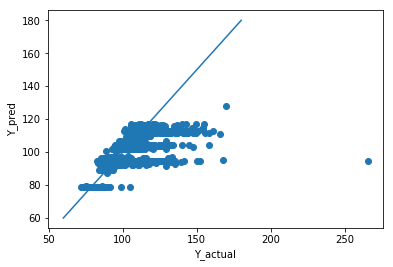

In [27]:
# scatter plot of pred vs actual
y_pred = pred_1_train
y_actual=stack_train['label']
plt.scatter(y_actual,y_pred) #(x,y)
plt.plot( [60,180],[60,180] )
plt.ylabel('Y_pred')
plt.xlabel('Y_actual')
plt.show()

In [28]:
# Check predicted value difference 

K = pd.DataFrame({'PredValue':y_pred,
                  'ActualValue':y_actual})
K['diff']=K['PredValue']-K['ActualValue']
K.sort(['diff'])[0:100]

C:\Users\jseah003\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ActualValue,PredValue,diff
3960,265.32,94.831299,-170.488701
895,167.45,94.921776,-72.528224
2522,152.32,94.624428,-57.695572
3934,150.43,94.432686,-55.997314
1885,165.52,111.183594,-54.336406
3947,158.53,104.304131,-54.225869
3178,160.87,113.048500,-47.821500
3898,141.39,94.893944,-46.496056
4000,158.23,111.831665,-46.398335
4169,139.07,93.974152,-45.095848
